Action taken: turn_off_heating
Vacuum action: clean
Room states: {'Room A': 'dirty', 'Room B': 'unknown'}
Route planned from Home to Airport
Next action: turn_right
Chosen action: do_nothing
Learning: 👍 for random_product
Success rates: {'random_product': [1]}
Correct! Simple Reflex is the best choice for traffic_light!


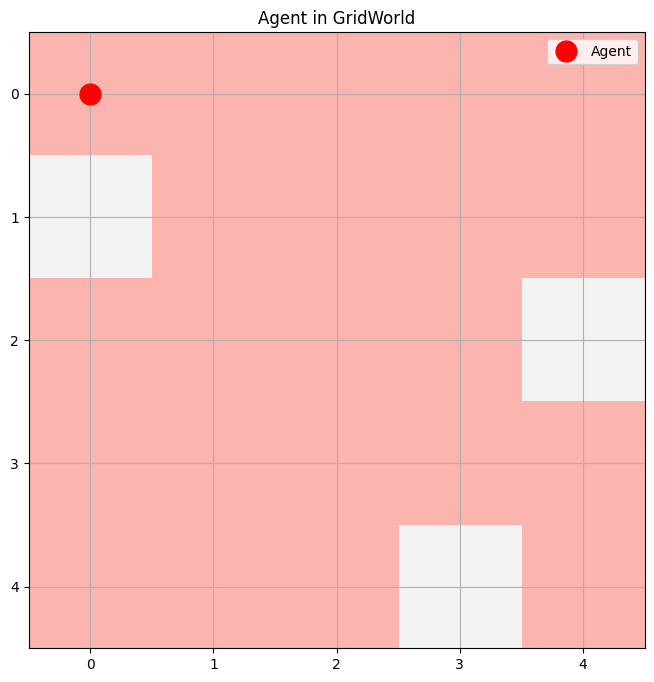

interactive(children=(Dropdown(description='agent_type', options=('Simple Reflex', 'Model Based', 'Goal Based'…

Running agent performance comparison...


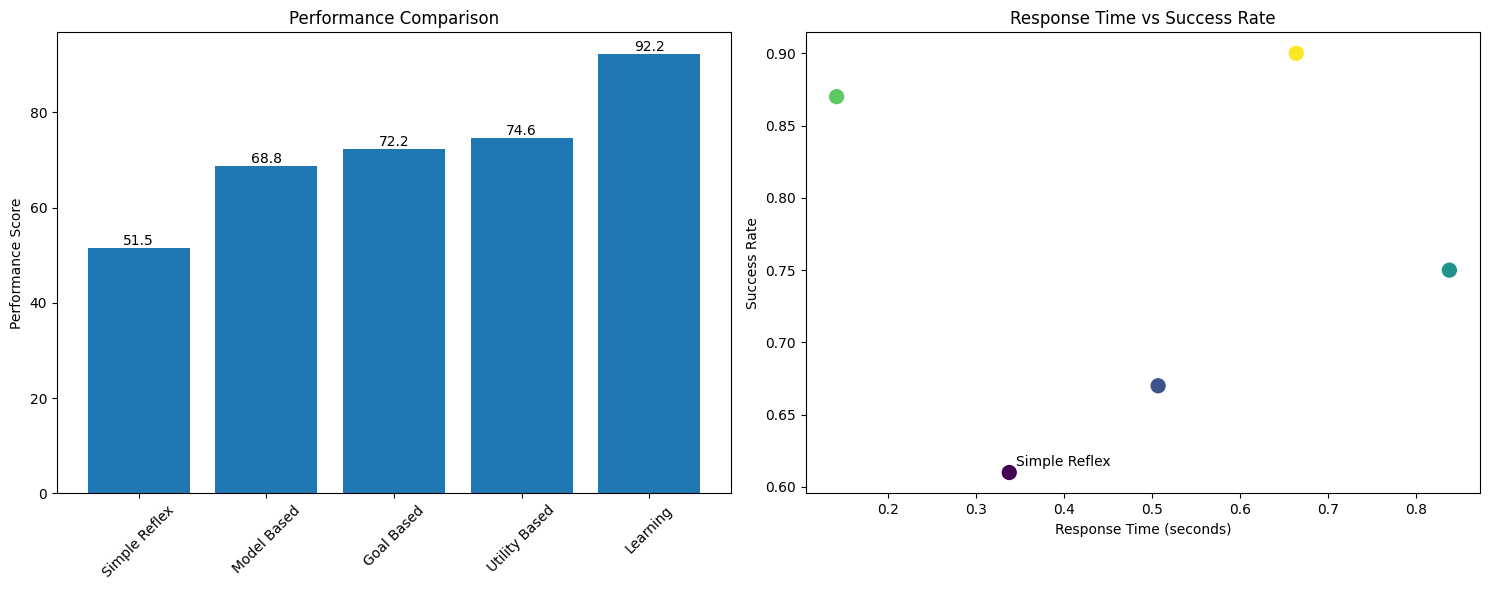


Detailed Performance Metrics:
      Agent Type  Average Performance  Response Time  Success Rate
0  Simple Reflex            51.510820       0.337817          0.61
1    Model Based            68.759087       0.506935          0.67
2     Goal Based            72.245991       0.837741          0.75
3  Utility Based            74.561453       0.141713          0.87
4       Learning            92.184590       0.663785          0.90

Analysis:

Best Overall Performance: Learning (Score: 92.2)
Fastest Response Time: Utility Based (Time: 0.142 seconds)
Highest Success Rate: Learning (Rate: 90.0%)


In [ ]:
# Code Cell 1: Simple Reflex Agent Example
class SimpleReflexThermostat:
  def __init__(self, desired_temp=20):
    self.desired_temp = desired_temp
  def act(self, current_temp):
    if current_temp > self.desired_temp:
      return "turn_off_heating"
    else:
      return "turn_on_heating"
# Example usage
thermostat = SimpleReflexThermostat(20)
action = thermostat.act(22) # Returns "turn_off_heating"
print(f"Action taken: {action}")



# Code Cell 2: Model-Based Reflex Agent Example
class ModelBasedVacuum:
 def __init__(self):
  # Internal state - map of the house
  self.room_states = {
   'Room A': 'unknown',
   'Room B': 'unknown'
  }
  self.current_location = 'Room A'
 def update_state(self, perception):
  # Update internal model
  dirt_status = perception['is_dirty']
  self.room_states[self.current_location] = 'dirty' if dirt_status else 'clean'
 def act(self, perception):
  # Update state first
  self.update_state(perception)
  # Make decision based on state and perception
  if perception['is_dirty']:
    return 'clean'
  elif all(state == 'clean' for state in self.room_states.values()):
    return 'do_nothing'
  else:
    return 'move_to_next_room'
# Example usage
vacuum = ModelBasedVacuum()
action = vacuum.act({'is_dirty': True})
print(f"Vacuum action: {action}")
print(f"Room states: {vacuum.room_states}")


# Code Cell 3: Goal-Based Agent Example
class GoalBasedNavigator:
  def __init__(self, destination):
    self.destination = destination
    self.current_location = None
    self.route = []
  def plan_route(self, current_location):
    self.current_location = current_location

    # Simplified planning (in real GPS would be more complex)
    self.route = ['turn_right', 'go_straight', 'turn_left'] # Simplified route
    print(f"Route planned from {current_location} to {self.destination}")
  def act(self):
    if self.current_location == self.destination:
      return "arrived"
    if self.route:
      next_step = self.route.pop(0)
      return next_step
      return "recalculating"
# Example usage
navigator = GoalBasedNavigator("Airport")
navigator.plan_route("Home")
print(f"Next action: {navigator.act()}")



# Code Cell 4: Utility-Based Agent Example
class UtilityBasedThermostat:
  def __init__(self):
    self.comfort_preference = 0.6 # 60% weight on comfort
    self.energy_preference = 0.4 # 40% weight on saving energy
  def calculate_comfort(self, temperature):
    # Simplified comfort calculation (ideal temp is 22°C)
    return 1.0 - abs(temperature - 22) / 10
  def calculate_energy_cost(self, energy_price, usage):
    # Simplified energy cost calculation
    cost_map = {"high": 0.2, "none": 1.0}
    return cost_map.get(usage, 0.6)
  def calculate_utility(self, action, temperature, energy_price):
    if action == "heat":
      comfort_utility = self.calculate_comfort(temperature + 1)
      energy_utility = self.calculate_energy_cost(energy_price, "high")
    elif action == "cool":
      comfort_utility = self.calculate_comfort(temperature - 1)
      energy_utility = self.calculate_energy_cost(energy_price, "high")
    else: # do nothing
      comfort_utility = self.calculate_comfort(temperature)
      energy_utility = self.calculate_energy_cost(energy_price, "none")
    total_utility = (comfort_utility * self.comfort_preference +
          energy_utility * self.energy_preference)
    return total_utility
  def act(self, temperature, energy_price):
    utilities = {
      "heat": self.calculate_utility("heat", temperature, energy_price),
      "cool": self.calculate_utility("cool", temperature, energy_price),
      "do_nothing": self.calculate_utility("do_nothing", temperature, energy_price)
    }
    return max(utilities, key=utilities.get)

# Example usage
smart_thermostat = UtilityBasedThermostat()
action = smart_thermostat.act(temperature=24, energy_price="high")
print(f"Chosen action: {action}")



# Code Cell 5: Learning Agent Example
class LearningRecommender:
  def __init__(self):
    self.user_preferences = {}
    self.success_rate = {}
  def learn_from_feedback(self, recommendation, user_liked):
    if recommendation not in self.success_rate:
      self.success_rate[recommendation] = []
    self.success_rate[recommendation].append(1 if user_liked else 0)
    print(f"Learning: {'👍' if user_liked else '👎'} for {recommendation}")
  def make_recommendation(self, user_history):
    # Start with random recommendations
    if not self.success_rate:
      return "random_product"
    # Use learned preferences
    best_recommendation = max(
      self.success_rate.items(),
      key=lambda x: sum(x[1]) / len(x[1])
    )[0]
    return best_recommendation

# Example usage
recommender = LearningRecommender()
recommendation = recommender.make_recommendation(["previous_purchases"])
recommender.learn_from_feedback(recommendation, user_liked=True)
print(f"Success rates: {recommender.success_rate}")



# Code Cell 6: Test Your Understanding
def test_agent_knowledge(your_answer, scenario):
    answers = {
      'traffic_light': 'Simple Reflex',
      'chess': 'Utility-Based',
      'shopping': 'Learning',
      'security': 'Model-Based',
      'self_driving': 'Hybrid'
    }
    if your_answer.lower() == answers[scenario].lower():
      print(f"Correct! {answers[scenario]} is the best choice for {scenario}!")
    else:
      print(f"Think again! Consider why {answers[scenario]} might be best for {scenario}")


# Example usage:
test_agent_knowledge('Simple Reflex', 'traffic_light')



# Code Cell: Visual Environment Setup
import matplotlib.pyplot as plt
import numpy as np

class GridWorld:
  def __init__(self, size=5):
    self.size = size
    self.grid = np.zeros((size, size))
    self.agent_pos = [0, 0]
  def add_obstacles(self, n=3):
    for _ in range(n):
      x, y = np.random.randint(0, self.size, 2)
      if [x, y] != self.agent_pos:
        self.grid[x, y] = 1
  def visualize(self):
    plt.figure(figsize=(8, 8))
    plt.imshow(self.grid, cmap='Pastel1')
    plt.plot(self.agent_pos[1], self.agent_pos[0], 'ro', markersize=15, label='Agent')
    plt.grid(True)
    plt.title('Agent in GridWorld')
    plt.legend()
    plt.show()
# Create and display environment
world = GridWorld()
world.add_obstacles()
world.visualize()



# Code Cell: Interactive Decision Making
from ipywidgets import interact, widgets

def simulate_agent_decision(agent_type, scenario):
  decisions = {
    'Simple Reflex': {
      'obstacle_ahead': 'turn_right',
      'goal_in_sight': 'move_forward',
      'unknown_situation': 'stop'
    },
    'Model Based': {
      'obstacle_ahead': 'check_map_and_reroute',
      'goal_in_sight': 'verify_and_move',
      'unknown_situation': 'update_model'
    },
    'Goal Based': {
      'obstacle_ahead': 'plan_new_path',
      'goal_in_sight': 'optimize_path',
      'unknown_situation': 'evaluate_goals'
    }
  }
  return f"{agent_type} agent's decision in {scenario}: {decisions[agent_type][scenario]}"

# Create interactive widget
interact(
simulate_agent_decision,
agent_type=['Simple Reflex', 'Model Based', 'Goal Based'],
scenario=['obstacle_ahead', 'goal_in_sight', 'unknown_situation']
)



# First, let's define our base agent classes
class SimpleReflexAgent:
  def __init__(self):
    self.name = "Simple Reflex"
    self.actions_taken = 0
  def act(self, percept):
    self.actions_taken += 1
    return "action" if percept else "no_action"
class ModelBasedAgent:
  def __init__(self):
    self.name = "Model Based"
    self.internal_state = {}
    self.actions_taken = 0
  def act(self, percept):
    self.actions_taken += 1
    self.internal_state.update(percept)
    return "model_based_action"
class GoalBasedAgent:
  def __init__(self):
    self.name = "Goal Based"
    self.goals = []
    self.actions_taken = 0
  def act(self, percept):
    self.actions_taken += 1
    return "goal_directed_action"
class UtilityBasedAgent:
  def __init__(self):
    self.name = "Utility Based"
    self.utility_function = lambda x: x
    self.actions_taken = 0
  def act(self, percept):
    self.actions_taken += 1
    return "utility_maximizing_action"
class LearningAgent:
  def __init__(self):
    self.name = "Learning"
    self.knowledge = {}
    self.actions_taken = 0
  def act(self, percept):
    self.actions_taken += 1
    self.knowledge.update(percept)
    return "learned_action"

# Code Cell: Agent Performance Comparison
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def compare_agent_performance(num_trials=100):
    agents = {
      'Simple Reflex': SimpleReflexAgent(),
      'Model Based': ModelBasedAgent(),
      'Goal Based': GoalBasedAgent(),
      'Utility Based': UtilityBasedAgent(),
      'Learning': LearningAgent()
    }
    results = {
      'Agent Type': [],
      'Average Performance': [],
      'Response Time': [],
      'Success Rate': []
    }
    # Simulate each agent
    for agent_type, agent in agents.items():
    # Simulate performance metrics
    # Performance: Higher for more sophisticated agents
      base_performance = {
        'Simple Reflex': 60,
        'Model Based': 70,
        'Goal Based': 75,
        'Utility Based': 85,
        'Learning': 90
      }
      # Response time: Lower (better) for simpler agents
      base_response = {
        'Simple Reflex': 0.1,
        'Model Based': 0.3,
        'Goal Based': 0.5,
        'Utility Based': 0.7,
        'Learning': 0.9
      }
      # Calculate metrics with some random variation
      performance = np.random.normal(base_performance[agent_type], 5)
      response_time = np.random.exponential(base_response[agent_type])
      success = np.random.binomial(100, base_performance[agent_type]/100)/100

      results['Agent Type'].append(agent_type)
      results['Average Performance'].append(performance)
      results['Response Time'].append(response_time)
      results['Success Rate'].append(success)

    # Create DataFrame
    df = pd.DataFrame(results)

    # Visualize results
    plt.figure(figsize=(15, 6))

    # Performance Comparison
    plt.subplot(1, 2, 1)
    bars = plt.bar(df['Agent Type'], df['Average Performance'])
    plt.title('Performance Comparison')
    plt.xticks(rotation=45)
    plt.ylabel('Performance Score')

    # Add value labels on top of bars
    for bar in bars:
      height = bar.get_height()
      plt.text(bar.get_x() + bar.get_width()/2., height,
        f'{height:.1f}',
        ha='center', va='bottom')
    # Response Time vs Success Rate
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(df['Response Time'], df['Success Rate'],
        c=range(len(df)), cmap='viridis', s=100)

    # Add labels for each point
    for i, txt in enumerate(df['Agent Type']):
      plt.annotate(txt, (df['Response Time'][i], df['Success Rate'][i]),
        xytext=(5, 5), textcoords='offset points')
      plt.xlabel('Response Time (seconds)')
      plt.ylabel('Success Rate')
      plt.title('Response Time vs Success Rate')

      plt.tight_layout()
      plt.show()
      return df

# Run the comparison
print("Running agent performance comparison...")
performance_data = compare_agent_performance()
print("\nDetailed Performance Metrics:")
print(performance_data)

# Add some analysis
print("\nAnalysis:")
best_performer = performance_data.loc[performance_data['Average Performance'].idxmax()]
fastest_agent = performance_data.loc[performance_data['Response Time'].idxmin()]
most_successful = performance_data.loc[performance_data['Success Rate'].idxmax()]

print(f"\nBest Overall Performance: {best_performer['Agent Type']} "
  f"(Score: {best_performer['Average Performance']:.1f})")
print(f"Fastest Response Time: {fastest_agent['Agent Type']} "
  f"(Time: {fastest_agent['Response Time']:.3f} seconds)")
print(f"Highest Success Rate: {most_successful['Agent Type']} "
  f"(Rate: {most_successful['Success Rate']:.1%})")
